# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude with missing values for a few grids and time steps
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
# create the complex NaN case

import xarray as xr
import numpy as np
import os
import glob

path = './data/Source_nc_ERA5/'
nc_names = glob.glob(path+'ERA5_NA_*.nc')

for nc_name in nc_names:
    # cut nc file to a given location
    nc_name_base = os.path.basename(nc_name)
    ds = xr.open_dataset(nc_name)
    ds_subset = ds.sel(latitude=slice(50.2, 50), longitude=slice(-114.2, -114))
    print(ds_subset)
    # save
    if os.path.isfile(path+nc_name_base+'onegrid'):
        os.remove(path+nc_name_base+'onegrid')
    ds_subset['airtemp'].encoding['_FillValue'] = None
    ds_subset['pptrate'].encoding['_FillValue'] = None
    ds_subset.to_netcdf(path+nc_name_base+'onegrid')

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, time: 24)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
  * time       (time) datetime64[ns] 1979-01-02 ... 1979-01-02T23:00:00
Data variables:
    pptrate    (time, latitude, longitude) float32 ...
    airtemp    (time, latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
<xarray.Dataset>
Dimensions:    (lon

In [4]:
# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat_OneGrid'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = './temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
esmr.target_shp_ID            = 'COMID' # if not provided easymore give ID according to shape order in shapefile
esmr.target_shp_lat           = 'lat' # if not provided the easymore provides lat from shape centroid
esmr.target_shp_lon           = 'lon' # if not provided the easymore provides lon from shape centroid
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = './data/Source_nc_ERA5/ERA5_NA_*.nconegrid'
# for complex issue with NaN this can be uncommented
# esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.ncNaN'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = './output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
#esmr.remap_csv                = esmr.temp_dir+esmr.case_name +'_remapping.csv'

esmr.source_nc_resolution = 0.25

# execute EASYMORE
esmr.nc_remapper()


EASYMORE version 2.0.0 is initiated.
no author name is provided. The author name is changed to (author name)!
EASYMORE is given multiple variables for remapping but only one format and fill value. EASYMORE repeats the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped netCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude variables has dimensions of:
['longitude']
EASYMORE detects that the latitude variables has dimensions of:
['latitude']
--CREATING-REMAPPING-FILE--
Started at date and time 2023-09-14 13:49:56.347788
EASYMORE detects that target shapefile is in WGS8

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

Remapping ./data/Source_nc_ERA5/ERA5_NA_19790101.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790101.nconegrid 
Started at date and time 2023-09-14 13:49:59.003097 
Converting variable temperature from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790101.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790101.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790101.nconegrid.csv 
Converting variable precipitation from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790101.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790101.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790101.nconegrid.csv 
Ended at date and time 2023-09-14 13:49:59.379739 
It took 0.376642 seconds to finish the remapping of variable(s) 

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

Remapping ./data/Source_nc_ERA5/ERA5_NA_19790102.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790102.nconegrid 
Started at date and time 2023-09-14 13:49:59.382445 
Converting variable temperature from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790102.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790102.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790102.nconegrid.csv 
Converting variable precipitation from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790102.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790102.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790102.nconegrid.csv 
Ended at date and time 2023-09-14 13:49:59.763509 
It took 0.381064 seconds to finish the remapping of variable(s) 

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

Remapping ./data/Source_nc_ERA5/ERA5_NA_19790103.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790103.nconegrid 
Started at date and time 2023-09-14 13:49:59.765661 
Converting variable temperature from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790103.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790103.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790103.nconegrid.csv 
Converting variable precipitation from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790103.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790103.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790103.nconegrid.csv 
Ended at date and time 2023-09-14 13:50:00.163752 
It took 0.398091 seconds to finish the remapping of variable(s) 

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1836: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

------------
------------
# Visualization of the source and result using easymore functionality

EASYMORE version 2.0.0 is initiated.
EASYMORE detects case 1 - regular lat/lon
[[50.25 50.25 50.25]
 [50.   50.   50.  ]
 [49.75 49.75 49.75]]
[[-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]]
the closest time step to what is provided for vizualization  1979-01-01 3:00:00  is  1979-01-01 03:00:00  with step in the netcdf file:  3
min: 254.43663024902344, max: 254.43663024902344 for variable: airtemp in source nc file for the time step: 1979-01-01 03:00:00


/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2330: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x[0], x[-1])
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2331: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y[0], y[-1])


EASYMORE detects case 1 - regular lat/lon
[[50.25 50.25 50.25]
 [50.   50.   50.  ]
 [49.75 49.75 49.75]]
[[-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]]
the closest time step to what is provided for vizualization  1979-01-01 3:00:00  is  1979-01-01 03:00:00  with step in the netcdf file:  3
min: 254.43663024902344, max: 254.43663024902344 for variable: airtemp in source nc file for the time step: 1979-01-01 03:00:00
min: 254.43663024902344, max: 254.43663024902344 for variable: temperature in remapped nc file for the time step: 1979-01-01 03:00:00


/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2330: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x[0], x[-1])
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2331: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y[0], y[-1])


EASYMORE detects case 1 - regular lat/lon
[[50.25 50.25 50.25]
 [50.   50.   50.  ]
 [49.75 49.75 49.75]]
[[-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]]
the closest time step to what is provided for vizualization  1979-01-01 3:00:00  is  1979-01-01 03:00:00  with step in the netcdf file:  3
min: 254.43663024902344, max: 254.43663024902344 for variable: airtemp in source nc file for the time step: 1979-01-01 03:00:00
min: 254.43663024902344, max: 254.43663024902344 for variable: temperature in remapped nc file for the time step: 1979-01-01 03:00:00


/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2330: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x[0], x[-1])
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/plot/dataarray_plot.py:2331: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(y[0], y[-1])
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/subprocess.py:1052: ResourceWarning: subprocess 40028 is still running
  _warn("subprocess %s is still running" % self.pid,


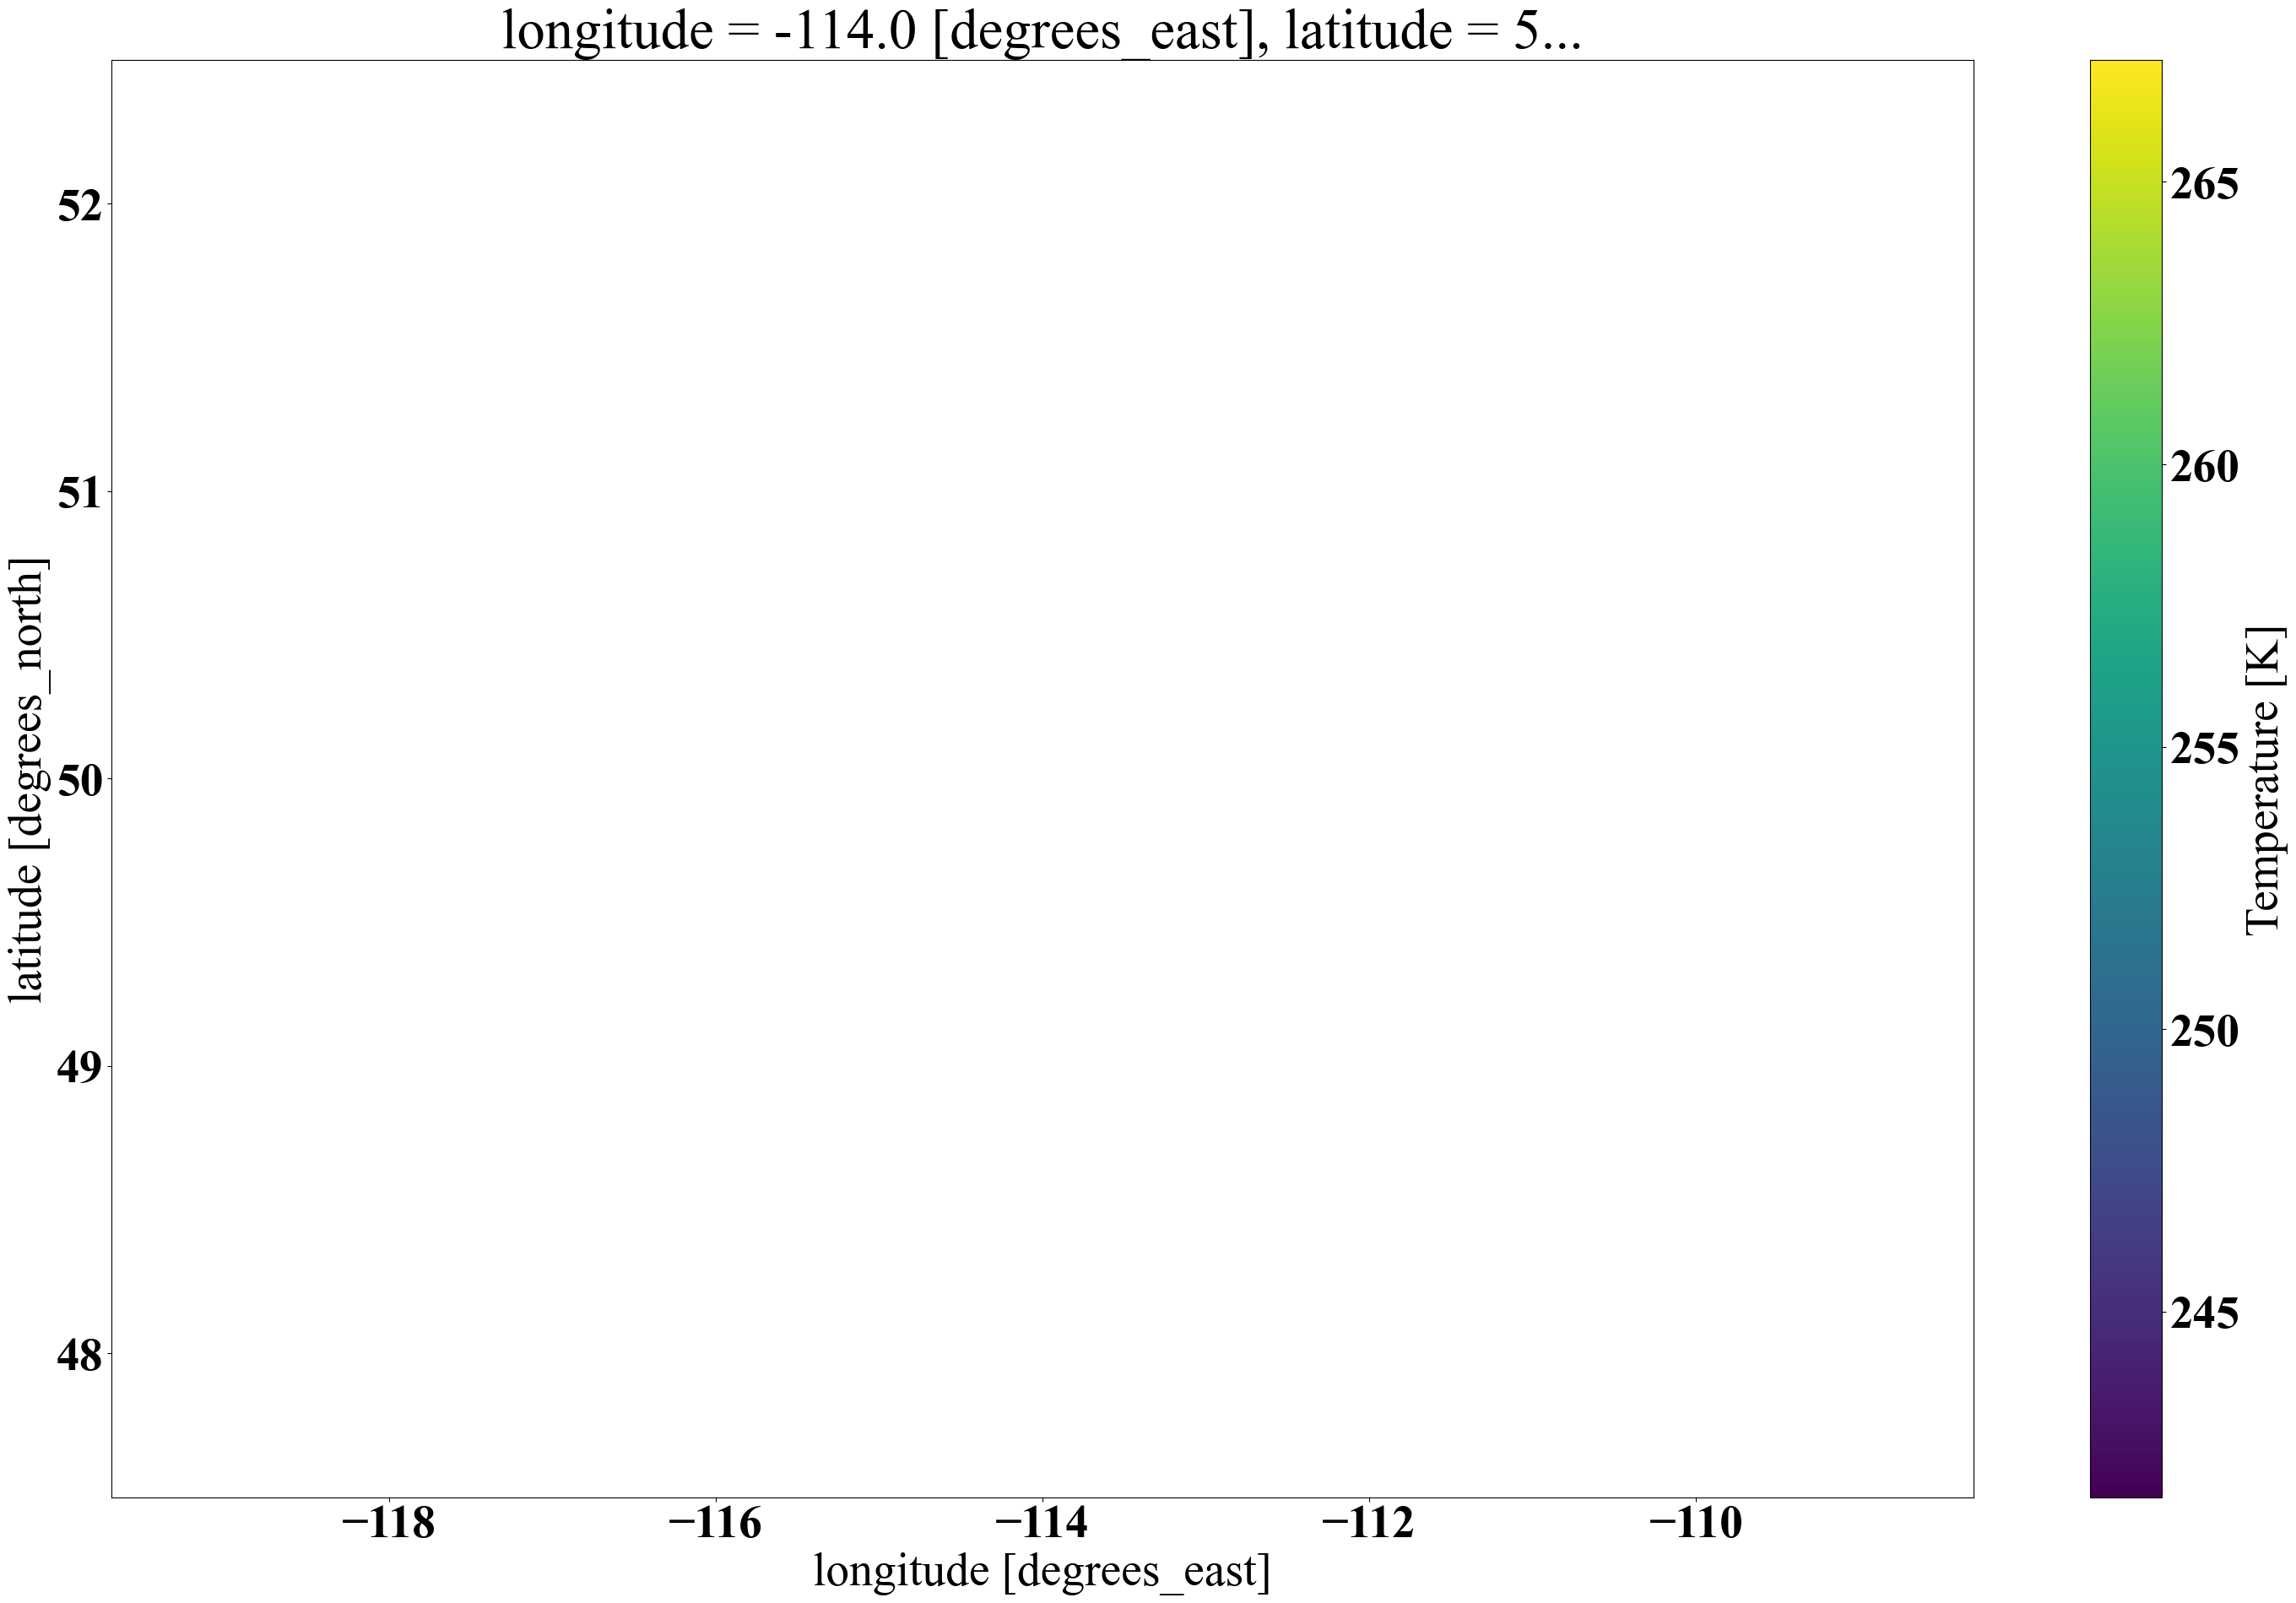

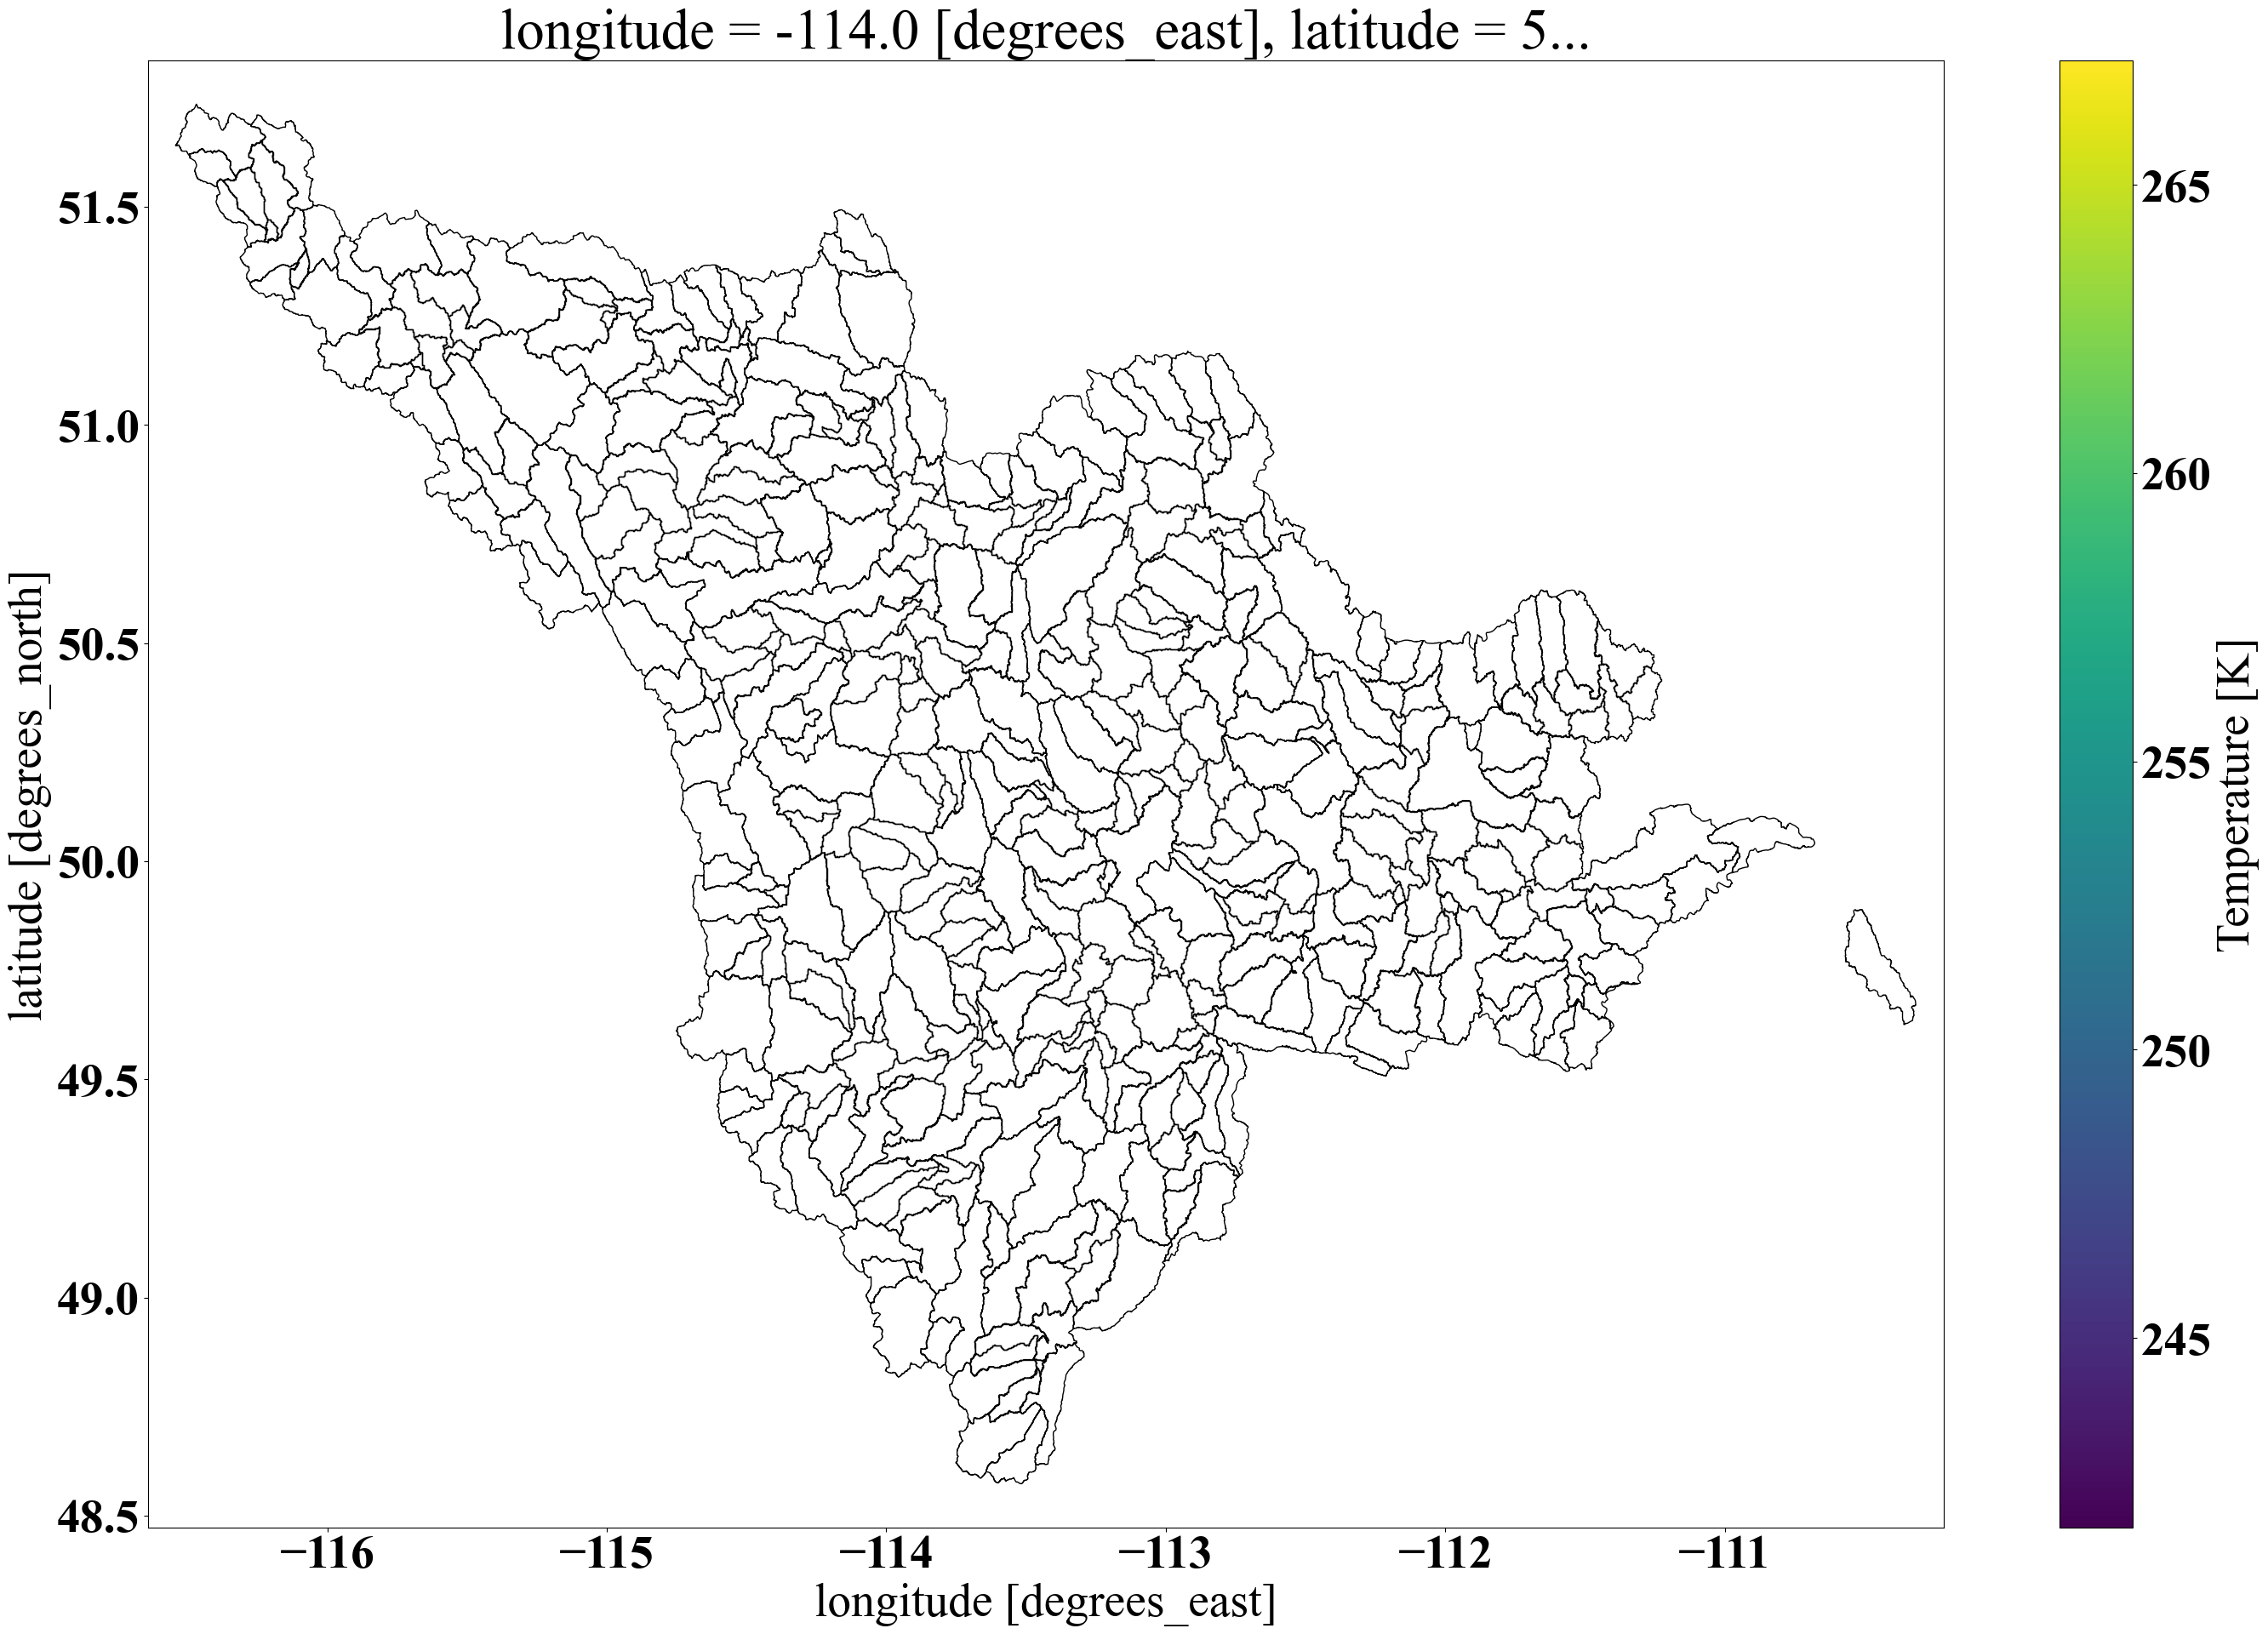

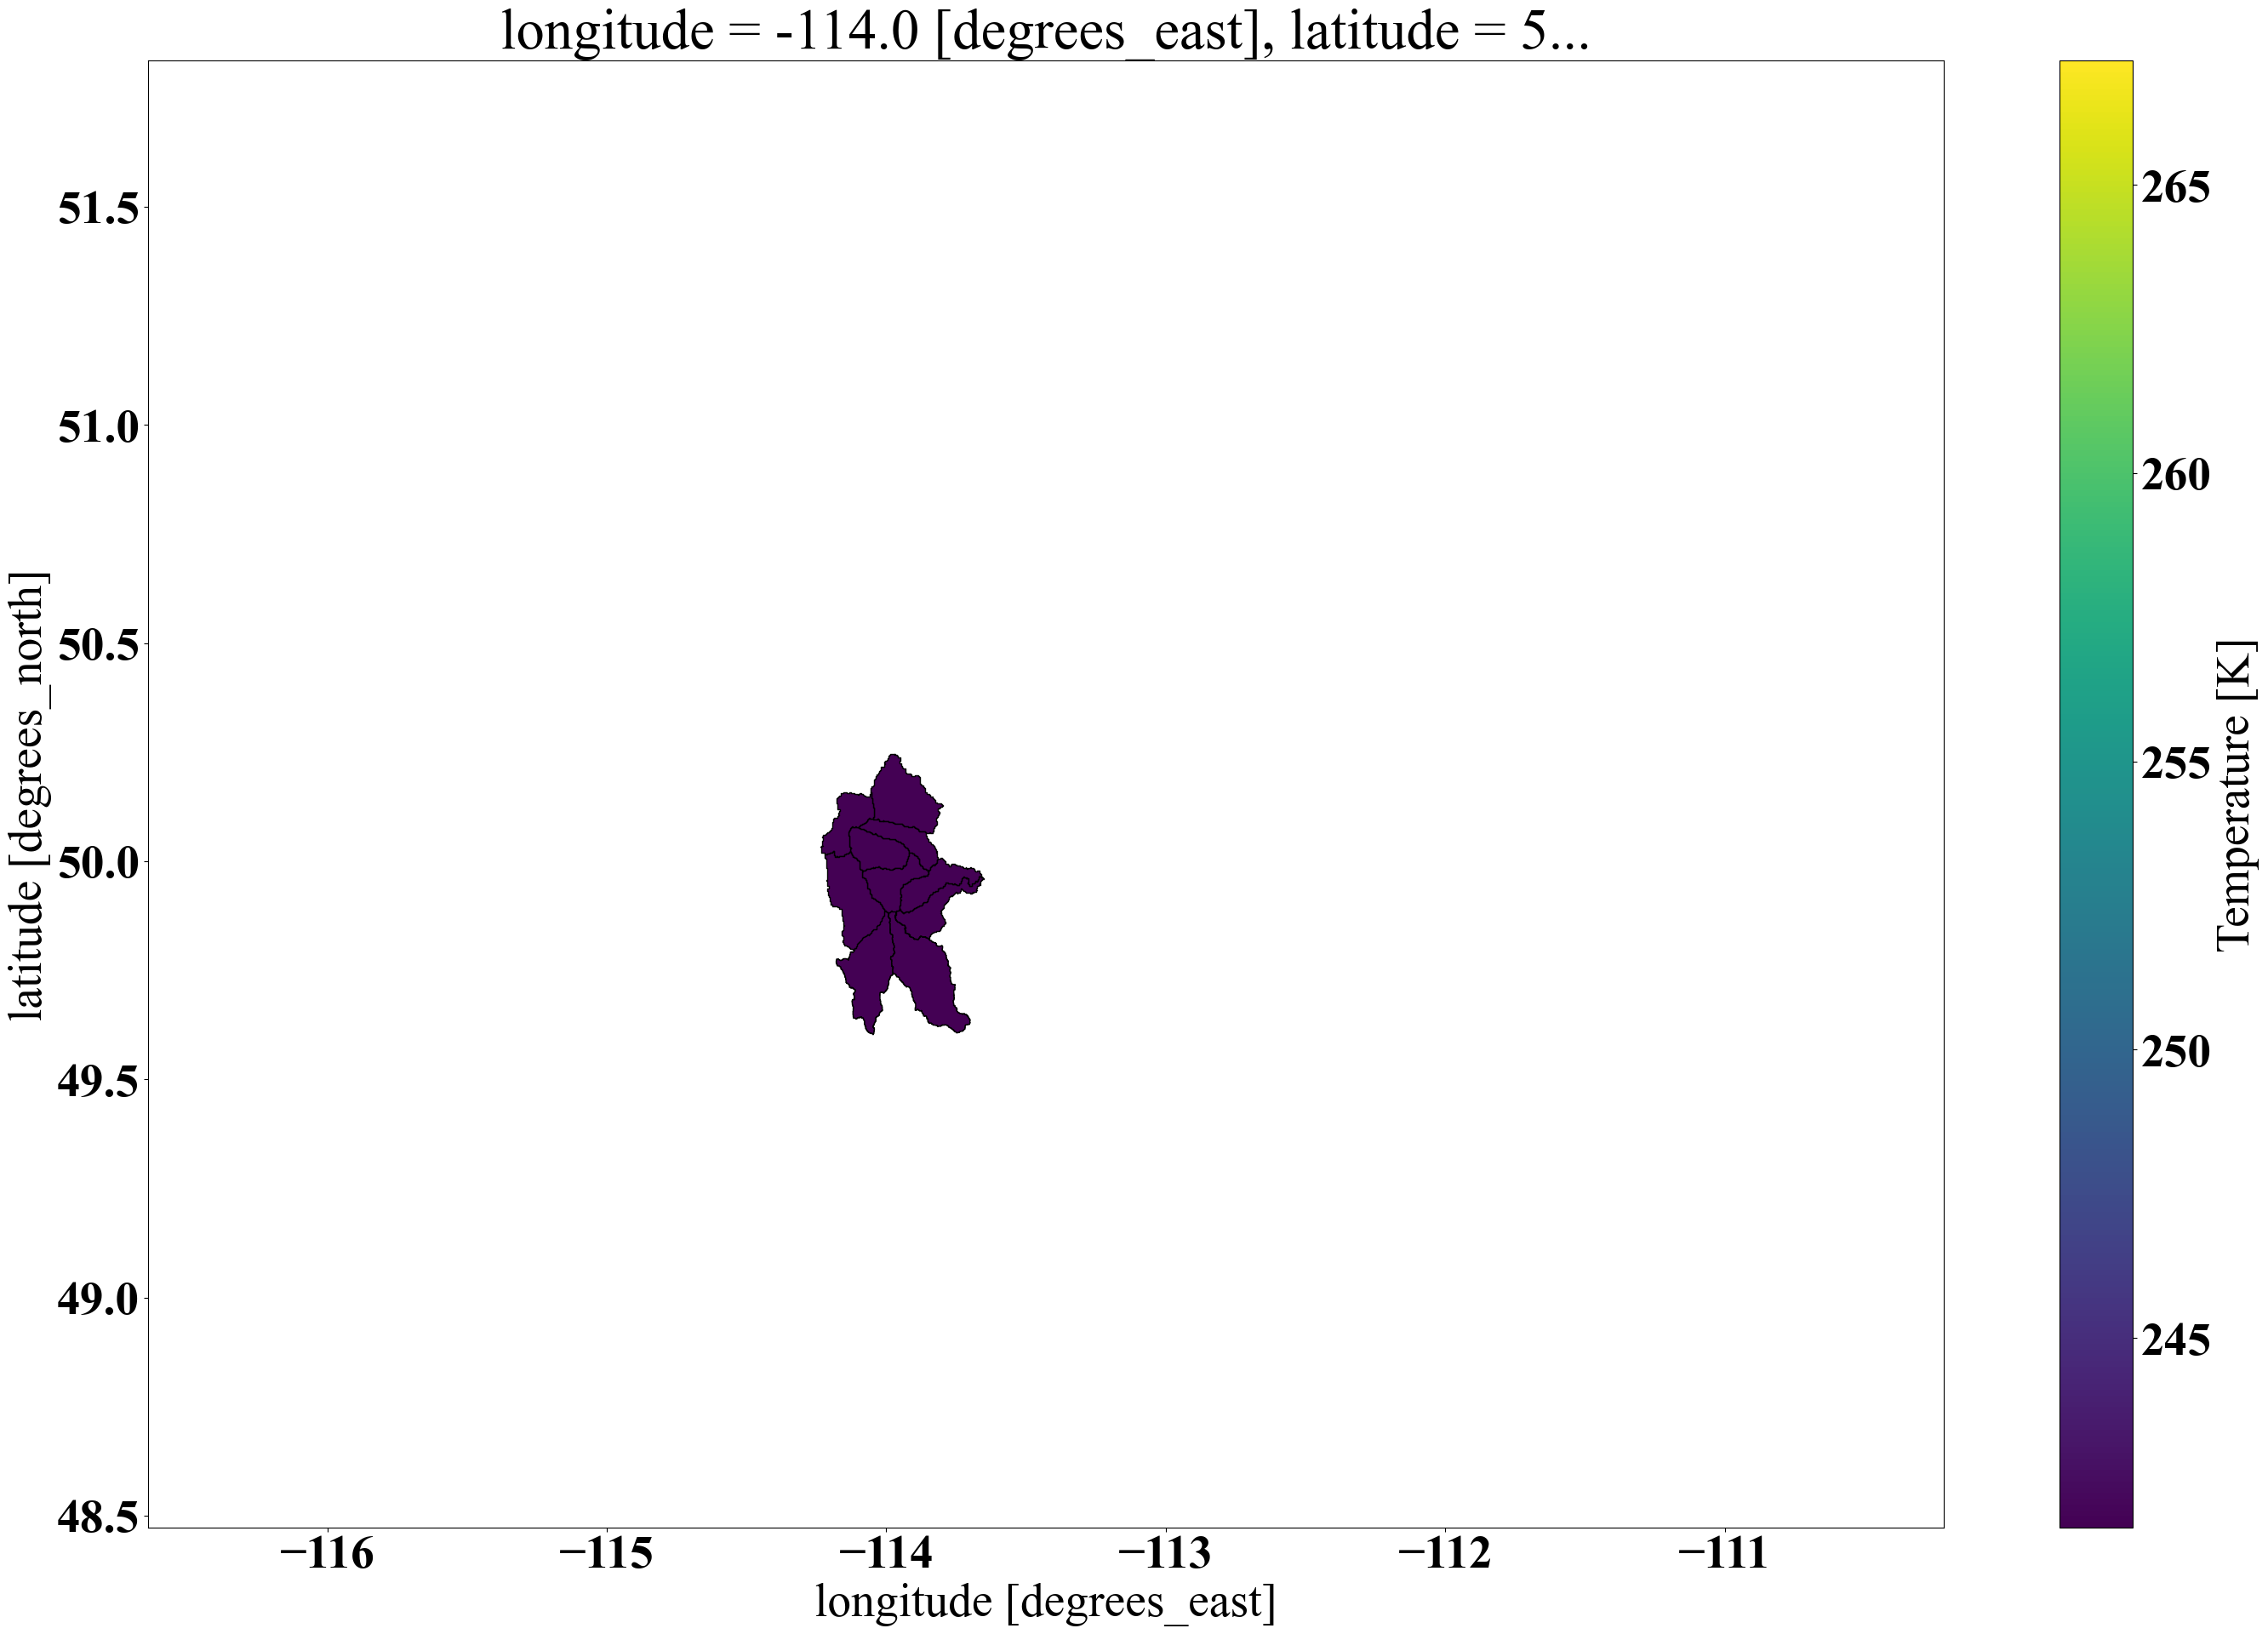

In [3]:
# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# define the source, and target files and parameters
case_name                  = 'ERA5_Medicine_Hat_OneGrid'  
source_nc_name             = './data/Source_nc_ERA5/ERA5_NA_19790101.nconegrid'
source_nc_var_lon          = 'longitude'
source_nc_var_lat          = 'latitude'
source_nc_var_time         = 'time'
source_nc_var_name         = 'airtemp'
remapped_nc_name           = './output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790101.nconegrid'
remapped_nc_var_name       = 'temperature'
remapped_nc_var_ID         = 'ID'
remapped_nc_var_time       = 'time'
time_step_of_viz           = '1979-01-01 3:00:00'
folder_save_fig            = './fig/'
target_shp_name            = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
target_shp_field_ID        = 'COMID'
cmap                       = 'viridis'
linewidth_remapped         = 1
margin                     = 0.1
font_size                  = 40
fig_size                   = (30,20)

esmr.source_nc_resolution = 0.25

# the source nc file
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            fig_name                   = case_name+'_1.png',
            cmap                       = cmap,
            font_size                  = font_size,
            fig_size                   = fig_size)


# the source nc file zoom to target shapefile without showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            target_shp_name            = target_shp_name,
            linewidth_remapped         = linewidth_remapped,
            show_target_shp_flag       = True,
            fig_name                   = case_name+'_2.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size)


# the source nc file zoom to target shapefile with showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            target_shp_name            = target_shp_name,
            target_shp_field_ID        = target_shp_field_ID,
            linewidth_remapped         = linewidth_remapped,
            show_target_shp_flag       = True,
            show_remapped_values_flag  = True,
            fig_name                   = case_name+'_3.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size)



# merge the two figures into one
from PIL import Image, ImageFont, ImageDraw
image_list = [folder_save_fig+case_name+'_2.png' , folder_save_fig+case_name+'_3.png']
image_list_cropped = [folder_save_fig+case_name+'_cropped_2.png' , folder_save_fig+case_name+'_cropped_3.png']


# crop if needed, can be commneted
im = Image.open(image_list[0])
width, height = im.size      
crop_area = (0, 0, width*0.87, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[0])
#
im = Image.open(image_list[1])
width, height = im.size 
crop_area = (width*0.0622, 0, width, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[1])

# merging
images = [Image.open(x) for x in image_list_cropped]
widths, heights = zip(*(i.size for i in images))
total_width = sum(widths)
max_height = max(heights)
new_im = Image.new('RGB', (total_width, max_height))
x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]
new_im.save(folder_save_fig+case_name+'.png')
new_im.save(folder_save_fig+'ERA5_NaN.png')
new_im.show()
